# Explore Nidhi & Amit's weight loss and related bio metrics

In [1]:
library(glue)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggrepel)
library(ggthemes)
library(lubridate)
library(tidyverse)
library(futile.logger)


Attaching package: ‘dplyr’


The following object is masked from ‘package:glue’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1     ✔ purrr   0.3.4
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubri

In [2]:
# read the raw data
START_DATE <- "2020-02-17"
DATA_DIR <- "data"
P1_NAME <- "Nidhi"
P2_NAME <- "Amit"
P1_DATA_FPATH <- file.path(DATA_DIR, glue("{P1_NAME}.csv"))
P2_DATA_FPATH <- file.path(DATA_DIR, glue("{P2_NAME}.csv"))
CAPTION <- "Source: Exported data from Ideal Protein app"
MONTH_ABB <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
IMPORTANT_DATES_FNAME <- "important_dates.csv"
IMPORTANT_DATES_FPATH <- file.path(DATA_DIR, IMPORTANT_DATES_FNAME)
NUDGE_X <- 1
NUDGE_Y <- 5

# print the parameters used
flog.info(glue("params used: START_DATE={START_DATE}, DATA_DIR={DATA_DIR},
                P1_NAME={P1_NAME}, P2_NAME={P2_NAME},
                P1_DATA_FPATH={P1_DATA_FPATH}, P2_DATA_FPATH={P2_DATA_FPATH}"))

INFO [2020-07-28 22:04:10] params used: START_DATE=2020-02-17, DATA_DIR=data,
P1_NAME=Nidhi, P2_NAME=Amit,
P1_DATA_FPATH=data/Nidhi.csv, P2_DATA_FPATH=data/Amit.csv


In [3]:
df_P1 <- read_csv(P1_DATA_FPATH) %>%
  mutate(name=P1_NAME) %>%
  arrange(Date) %>%
  filter(Date >= START_DATE)
flog.info(glue("read data for {P1_NAME} from {P1_DATA_FPATH}, shape of dataframe={nrow(df_P1)}x{ncol(df_P1)}"))
print(head(df_P1))
print(summary(df_P1))

if(!is.na(P2_NAME)) {
    df_P2 <- read_csv(P2_DATA_FPATH) %>%
  mutate(name=P2_NAME) %>%
  arrange(Date) %>%
  filter(Date >= START_DATE)
  flog.info(glue("read data for {P2_NAME} from {P2_DATA_FPATH}, shape of dataframe={nrow(df_P2)}x{ncol(df_P2)}"))
  print(head(df_P2))  
  print(summary(df_P2))  
}

if(!is.na(IMPORTANT_DATES_FNAME)) {
  important_dates <- read_csv(IMPORTANT_DATES_FPATH)
  flog.info(glue("read data for important dates from {IMPORTANT_DATES_FNAME}, shape of dataframe={nrow(important_dates)}x{ncol(important_dates)}"))
  print(head(important_dates))  
  print(summary(important_dates))  
}

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Weight = col_double(),
  BMI = col_double(),
  `Body Fat` = col_double(),
  `Lean Mass` = col_double(),
  `Muscle Percentage` = col_double(),
  `Water Percentage` = col_double()
)



INFO [2020-07-28 22:04:10] read data for Nidhi from data/Nidhi.csv, shape of dataframe=188x8
# A tibble: 6 x 8
  Date       Weight   BMI `Body Fat` `Lean Mass` `Muscle Percent…
  <date>      <dbl> <dbl>      <dbl>       <dbl>            <dbl>
1 2020-02-17   152.  28         32.3        103.             32  
2 2020-02-18   150.  27.7       32          102.             32.1
3 2020-02-19   150.  27.5       31.8        102.             32.1
4 2020-02-20   149.  27.4       31.7        102.             32.1
5 2020-02-21   147.  27.1       31.4        101.             32.2
6 2020-02-23   148.  27.3       31.5        102.             32.2
# … with 2 more variables: `Water Percentage` <dbl>, name <chr>
      Date                Weight           BMI           Body Fat    
 Min.   :2020-02-17   Min.   :132.3   Min.   :24.30   Min.   :27.70  
 1st Qu.:2020-04-01   1st Qu.:137.3   1st Qu.:25.30   1st Qu.:29.02  
 Median :2020-05-09   Median :138.7   Median :25.50   Median :29.40  
 Mean   :2020-05-

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Weight = col_double(),
  BMI = col_double(),
  `Body Fat` = col_double(),
  `Lean Mass` = col_double(),
  `Muscle Percentage` = col_double(),
  `Water Percentage` = col_double()
)



INFO [2020-07-28 22:04:10] read data for Amit from data/Amit.csv, shape of dataframe=177x8
# A tibble: 6 x 8
  Date       Weight   BMI `Body Fat` `Lean Mass` `Muscle Percent…
  <date>      <dbl> <dbl>      <dbl>       <dbl>            <dbl>
1 2020-02-17   251.  38.1       35.9        161.             35.6
2 2020-02-18   248.  37.6       35.5        160.             35.8
3 2020-02-19   247.  37.5       35.5        160.             35.8
4 2020-02-20   246.  37.4       35.4        159.             35.8
5 2020-02-21   246.  37.3       35.3        159.             35.8
6 2020-02-22   246.  37.2       35.3        159.             35.9
# … with 2 more variables: `Water Percentage` <dbl>, name <chr>
      Date                Weight           BMI           Body Fat    
 Min.   :2020-02-17   Min.   :208.1   Min.   :31.50   Min.   :30.30  
 1st Qu.:2020-03-30   1st Qu.:217.6   1st Qu.:33.00   1st Qu.:31.70  
 Median :2020-05-10   Median :225.1   Median :34.10   Median :32.80  
 Mean   :2020-05-08

Parsed with column specification:
cols(
  label = col_character(),
  Date = col_date(format = ""),
  include = col_logical(),
  name = col_character()
)



INFO [2020-07-28 22:04:10] read data for important dates from important_dates.csv, shape of dataframe=18x4
# A tibble: 6 x 4
  label                      Date       include name 
  <chr>                      <date>     <lgl>   <chr>
1 Nidhi's Birthday           2020-04-28 FALSE   Amit 
2 Aadit's Birthday           2020-05-27 FALSE   Amit 
3 Amit starts with Creatine  2020-05-04 TRUE    Amit 
4 Nidhi's Birthday           2020-04-28 TRUE    Nidhi
5 Aadit's Birthday           2020-05-27 FALSE   Nidhi
6 Nidhi starts with Creatine 2020-05-29 TRUE    Nidhi
    label                Date             include            name          
 Length:18          Min.   :2020-02-17   Mode :logical   Length:18         
 Class :character   1st Qu.:2020-03-17   FALSE:3         Class :character  
 Mode  :character   Median :2020-04-29   TRUE :15        Mode  :character  
                    Mean   :2020-05-04                                     
                    3rd Qu.:2020-05-28                         

In [4]:
# combine the dataframes
if(!is.na(df_P2)) {
  df <- bind_rows(df_P1, df_P2)
  (df) %>%
    sample_n(5)
  flog.info(glue("combined data for {P1_NAME} and {P2_NAME}, shape of data is {nrow(df)}x{ncol(df)}"))
} else {
  flog.info(glue("only {P1_NAME} specified, only analyzing data for one person"))
  df <- df_P1
}


Warning message in if (!is.na(df_P2)) {:
“the condition has length > 1 and only the first element will be used”


INFO [2020-07-28 22:04:11] combined data for Nidhi and Amit, shape of data is 365x8


In [5]:
# get the data in tidy format
flog.info("converting the data to tidy format")
df_tidy <- df %>%
  gather(metric, value, -Date, -name)
df_tidy %>%
  sample_n(5)
flog.info(glue("shape of the tidy dataframe is {nrow(df_tidy)}x{ncol(df_tidy)}"))

INFO [2020-07-28 22:04:11] converting the data to tidy format


Date,name,metric,value
<date>,<chr>,<chr>,<dbl>
2020-06-24,Amit,Weight,215.61
2020-03-08,Amit,BMI,36.30
2020-04-01,Nidhi,Body Fat,29.80
2020-03-17,Amit,BMI,35.90
2020-04-10,Amit,Weight,230.82


INFO [2020-07-28 22:04:11] shape of the tidy dataframe is 2190x4


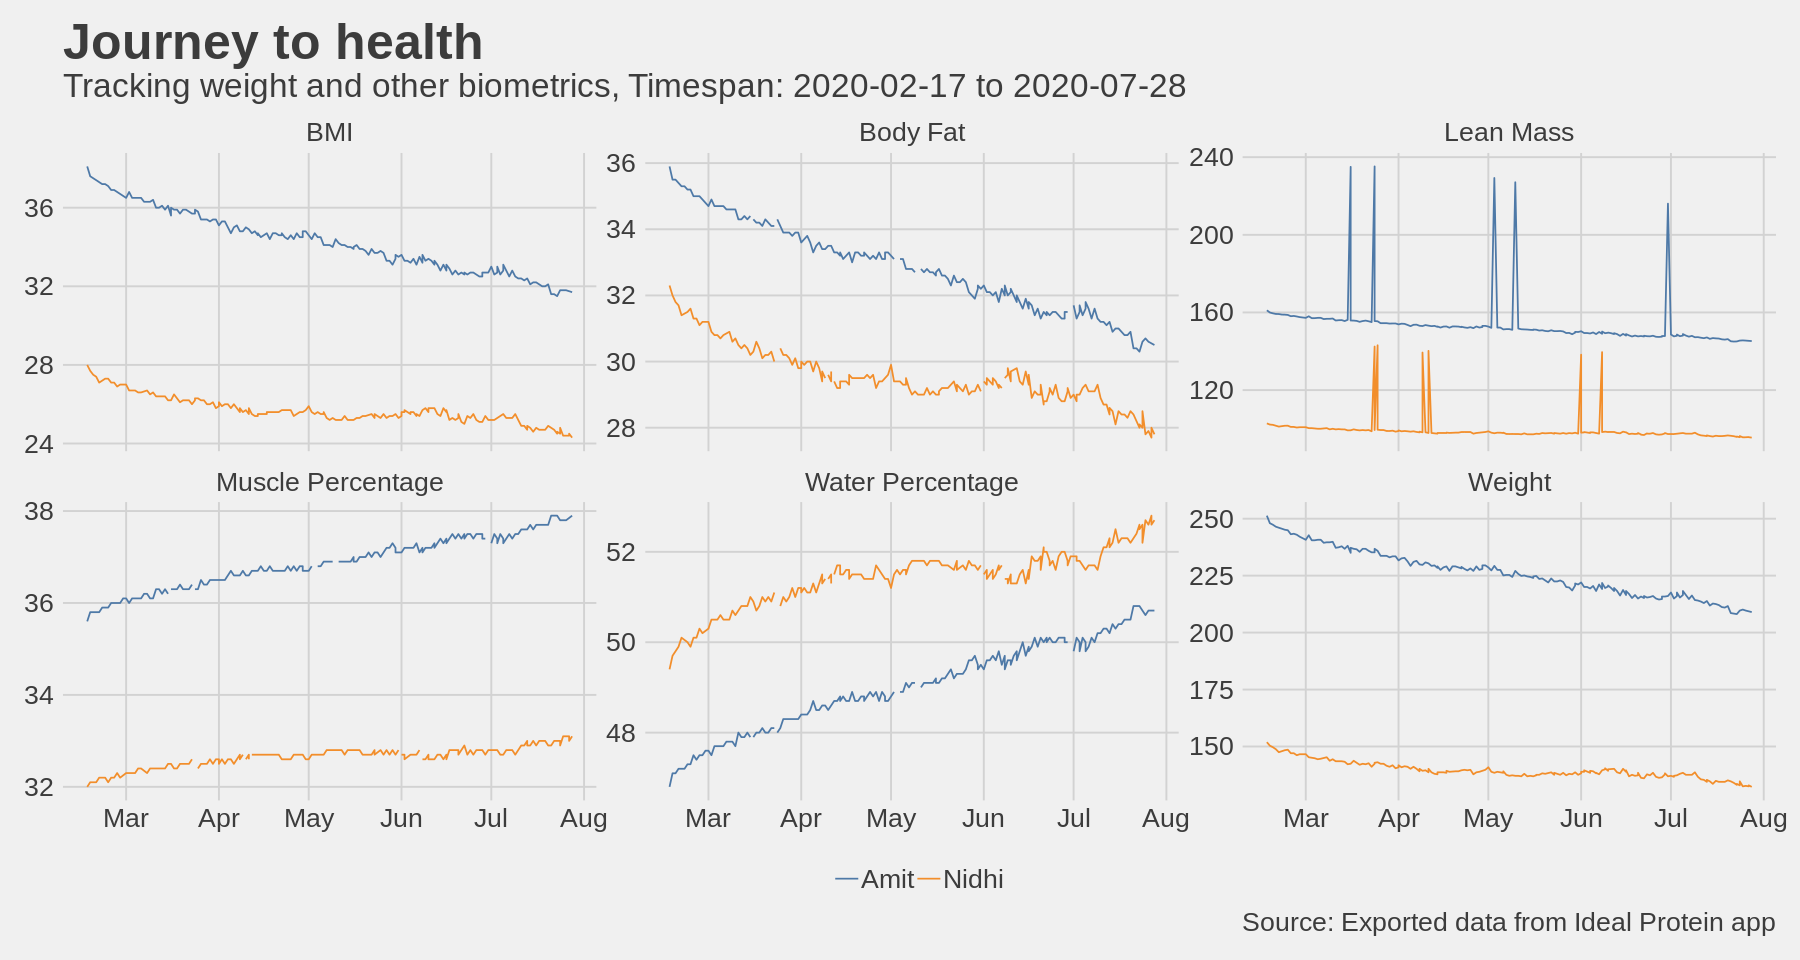

In [6]:
# plot some basic charts, since we have multiple metrics for each date
# so a faceted timeseries would be useful
options(repr.plot.width=15, repr.plot.height=8) 
df_tidy %>%
  ggplot(aes(x=Date, y=value, col=name)) +
  geom_line() +
  facet_wrap(~metric, scales = "free_y") + 
  theme_fivethirtyeight() +
  xlab("") +
  labs(title=glue("Journey to health"),
  subtitle=glue("Tracking weight and other biometrics, Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(text = element_text(size=20), legend.title = element_blank()) + 
  scale_color_tableau()

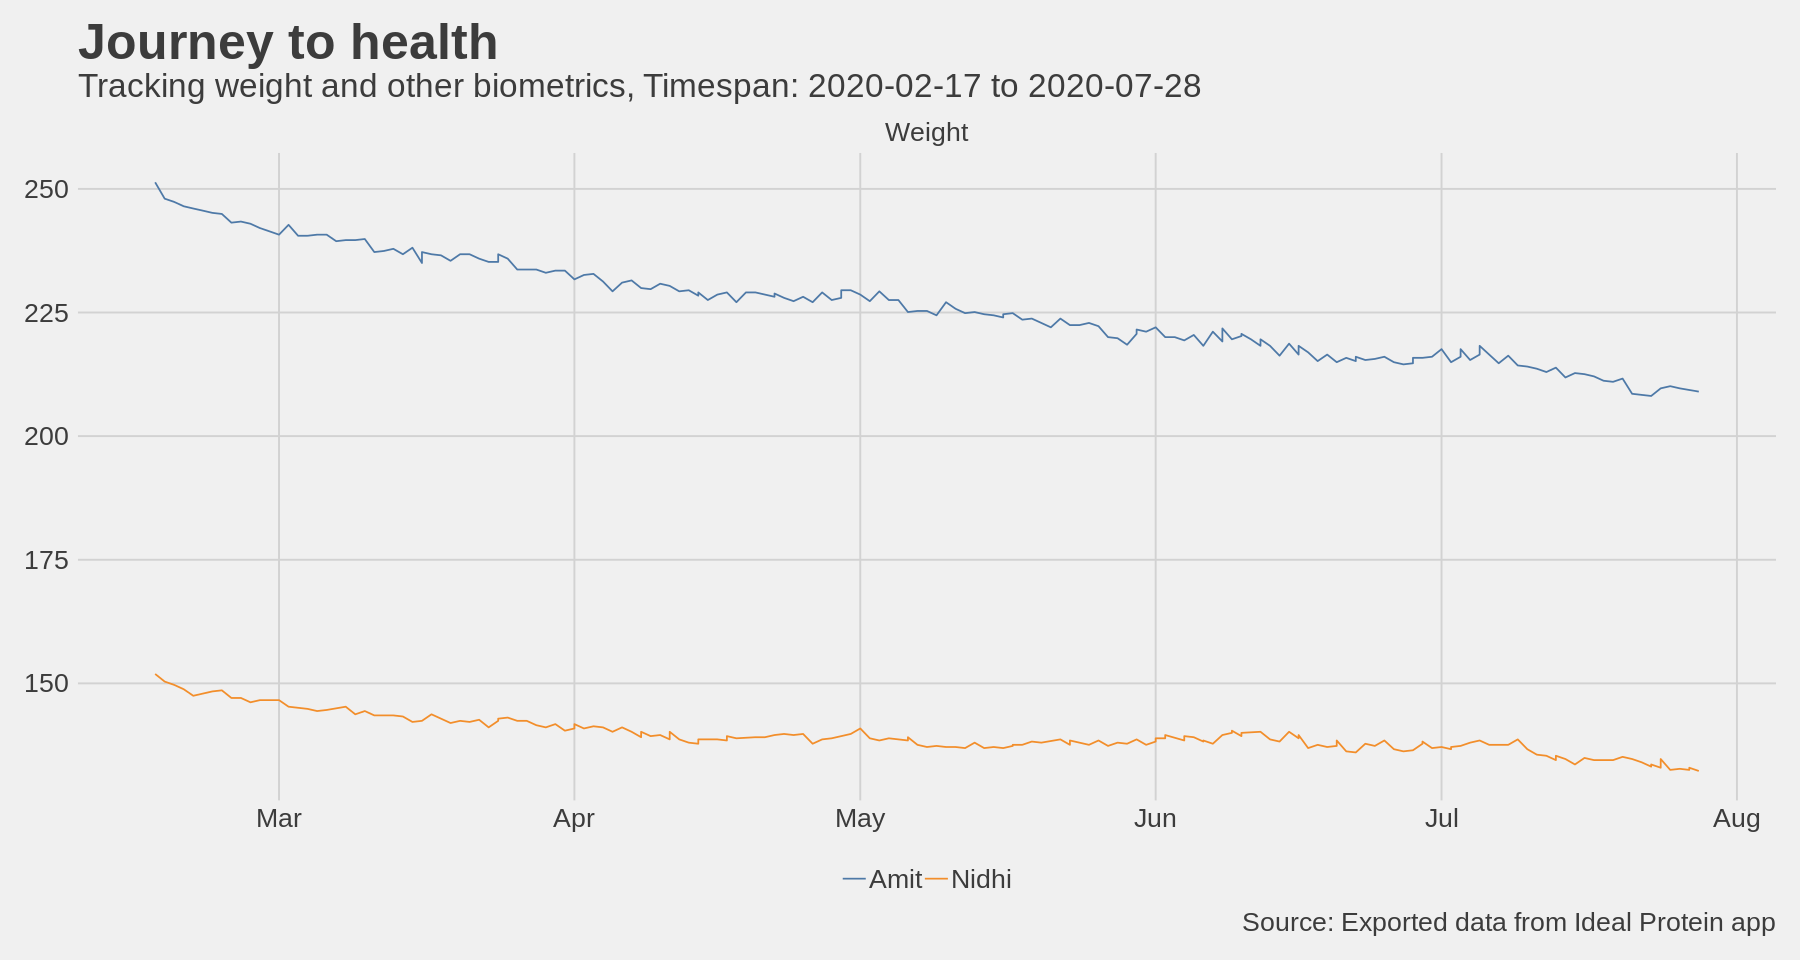

In [7]:
df_tidy %>%
  filter(metric=="Weight") %>%
  ggplot(aes(x=Date, y=value, col=name)) +
  geom_line() +
  facet_wrap(~metric, scales = "free_y") + 
  theme_fivethirtyeight() +
  xlab("") +
  labs(title=glue("Journey to health"),
  subtitle=glue("Tracking weight and other biometrics, Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(text = element_text(size=20), legend.title = element_blank()) + 
  scale_color_tableau()

In [8]:
# weight loss per day
flog.info("creating a separate dataframe for tracking weight loss per day")
df_daily_wt_loss <- df_tidy %>%
  filter(metric == "Weight") %>%
  group_by(name) %>%
  mutate(daily_wt_loss = value - lag(value))

df_daily_wt_loss %>%
  sample_n(5)

INFO [2020-07-28 22:04:12] creating a separate dataframe for tracking weight loss per day


Date,name,metric,value,daily_wt_loss
<date>,<chr>,<chr>,<dbl>,<dbl>
2020-05-11,Amit,Weight,225.75,-1.33
2020-02-23,Amit,Weight,245.15,-0.45
2020-04-12,Amit,Weight,229.28,-1.10
2020-04-01,Amit,Weight,231.70,-1.77
2020-03-12,Amit,Weight,237.44,0.22
2020-07-05,Nidhi,Weight,138.45,0.44
2020-05-17,Nidhi,Weight,137.57,0.22
2020-06-29,Nidhi,Weight,138.23,0.44
2020-04-12,Nidhi,Weight,138.67,-1.54


Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”


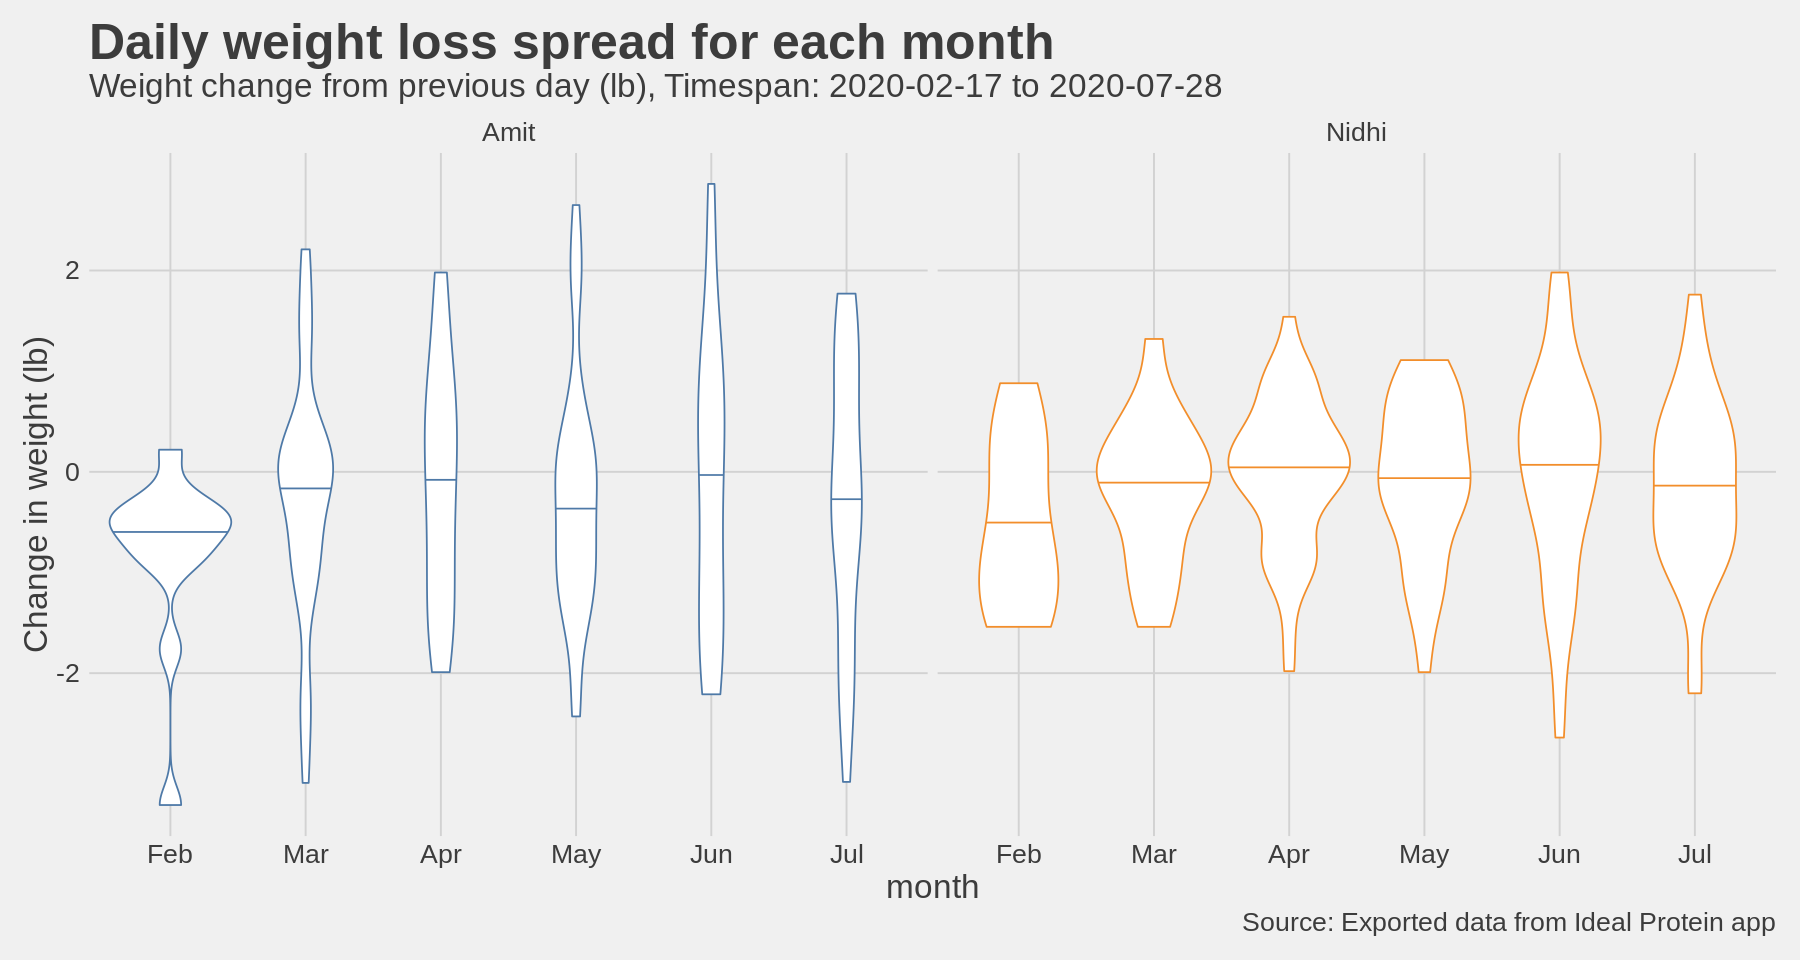

In [9]:
df_daily_wt_loss %>%
  mutate(month = month.abb[month(Date)]) %>%
  mutate(month = factor(month, levels = MONTH_ABB)) %>%
  arrange(month) %>%
  ggplot(aes(x=month, y=daily_wt_loss, col=name)) +
  geom_violin(draw_quantiles = c(0.5)) +
  scale_color_tableau() +
  theme_fivethirtyeight() +
  labs(title=glue("Daily weight loss spread for each month"),
  subtitle=glue("Weight change from previous day (lb), Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(text = element_text(size=20), legend.position = "none") + 
  theme(axis.title = element_text()) + ylab('Change in weight (lb)') +
  facet_wrap(~name)
  

In [10]:
# cumualative number of days on which weight was lost
flog.info("calculating cumulative weight loss as its own dataframe")
df_cumul_wt_loss_days <- df_daily_wt_loss %>%
  mutate(daily_wt_loss = ifelse(is.na(daily_wt_loss), 0, daily_wt_loss)) %>%
  mutate(was_this_a_wt_loss_day = (ifelse(daily_wt_loss < 0, 1, 0))) %>%
  mutate(cumul_wt_loss_days = cumsum(was_this_a_wt_loss_day)) %>%
  select(Date, name, cumul_wt_loss_days)

head(df_cumul_wt_loss_days, 5)

INFO [2020-07-28 22:04:13] calculating cumulative weight loss as its own dataframe


Date,name,cumul_wt_loss_days
<date>,<chr>,<dbl>
2020-02-17,Nidhi,0
2020-02-18,Nidhi,1
2020-02-19,Nidhi,2
2020-02-20,Nidhi,3
2020-02-21,Nidhi,4


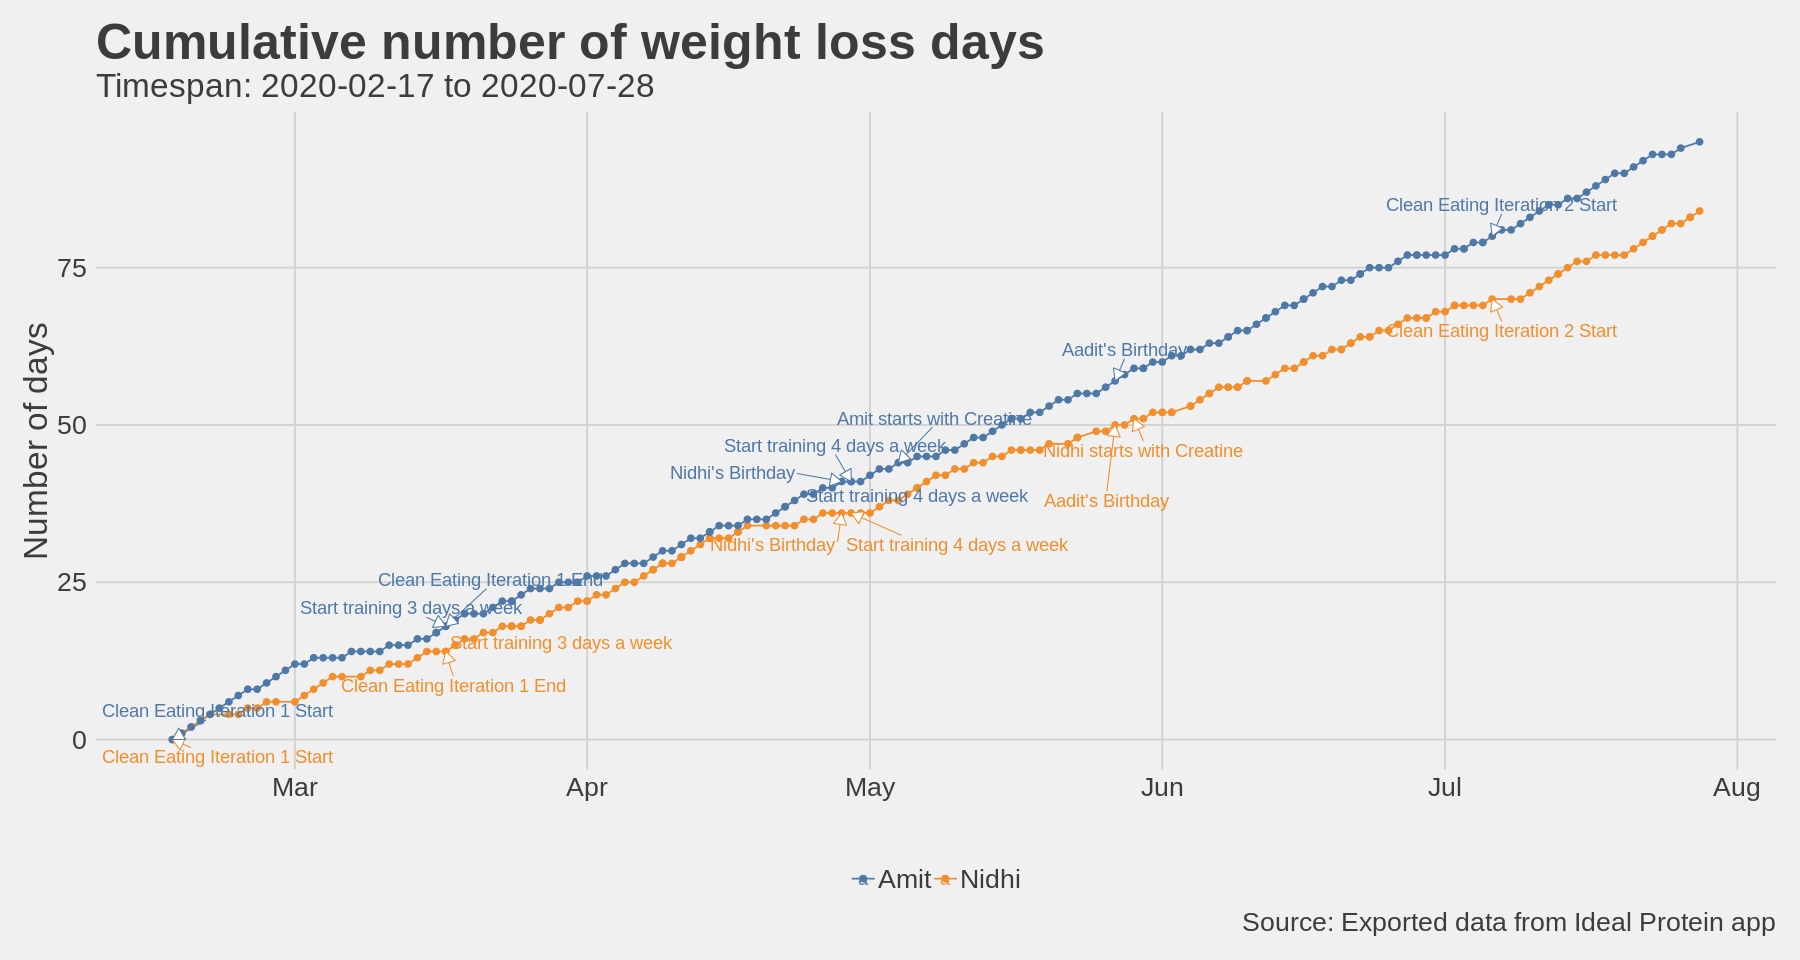

In [11]:
df_cumul_wt_loss_days_w_labels <- df_cumul_wt_loss_days %>%
  #mutate(label=ifelse(cumul_wt_loss_days==max(cumul_wt_loss_days), name, NA)) %>%
  left_join(important_dates, by=c("name", "Date")) %>%
  mutate(nudge_y = 5)

p <-  df_cumul_wt_loss_days_w_labels %>%
  ggplot(aes(x=Date, y=cumul_wt_loss_days, col=name)) +
  geom_line() +
  geom_point() + 
  theme_fivethirtyeight() +
  xlab("") + 
  labs(title=glue("Cumulative number of weight loss days"),
  subtitle=glue("Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(text = element_text(size=20), legend.position = "bottom", legend.title=element_blank()) + 
  theme(axis.title = element_text()) + ylab('Number of days') +
  scale_color_tableau() +
  geom_text_repel(aes(label = label),
                  nudge_x = 1,
                  nudge_y = ifelse(df_cumul_wt_loss_days_w_labels[!is.na(df_cumul_wt_loss_days_w_labels$label), ]$name==P1_NAME, -NUDGE_Y, NUDGE_Y),
                  segment.size  = 0.3,
                   arrow = arrow(length = unit(0.02, "npc"), type = "closed", ends = "last"),
                   force = 10,
                   na.rm = TRUE)
p

In [12]:
df_days_to_next_drop <- df_daily_wt_loss %>%
  mutate(value = floor(value)) %>%
  ungroup() %>%
  group_by(name, value) %>%
  summarize(Date=max(Date)) %>%
  arrange(desc(Date)) %>%
  mutate(value_diff=value-lag(value), days=abs(as.numeric(Date-lag(Date)))) %>%
  replace_na(list(value_diff = 0, days = 0)) %>%
  mutate(value=value-min(value)) %>%
  filter(value != 0)

head(df_days_to_next_drop, 5)

name,value,Date,value_diff,days
<chr>,<dbl>,<date>,<dbl>,<dbl>
Amit,1,2020-07-28,0,0
Amit,2,2020-07-25,1,3
Nidhi,2,2020-07-24,2,4
Nidhi,1,2020-07-23,-1,1
Amit,3,2020-07-20,3,3


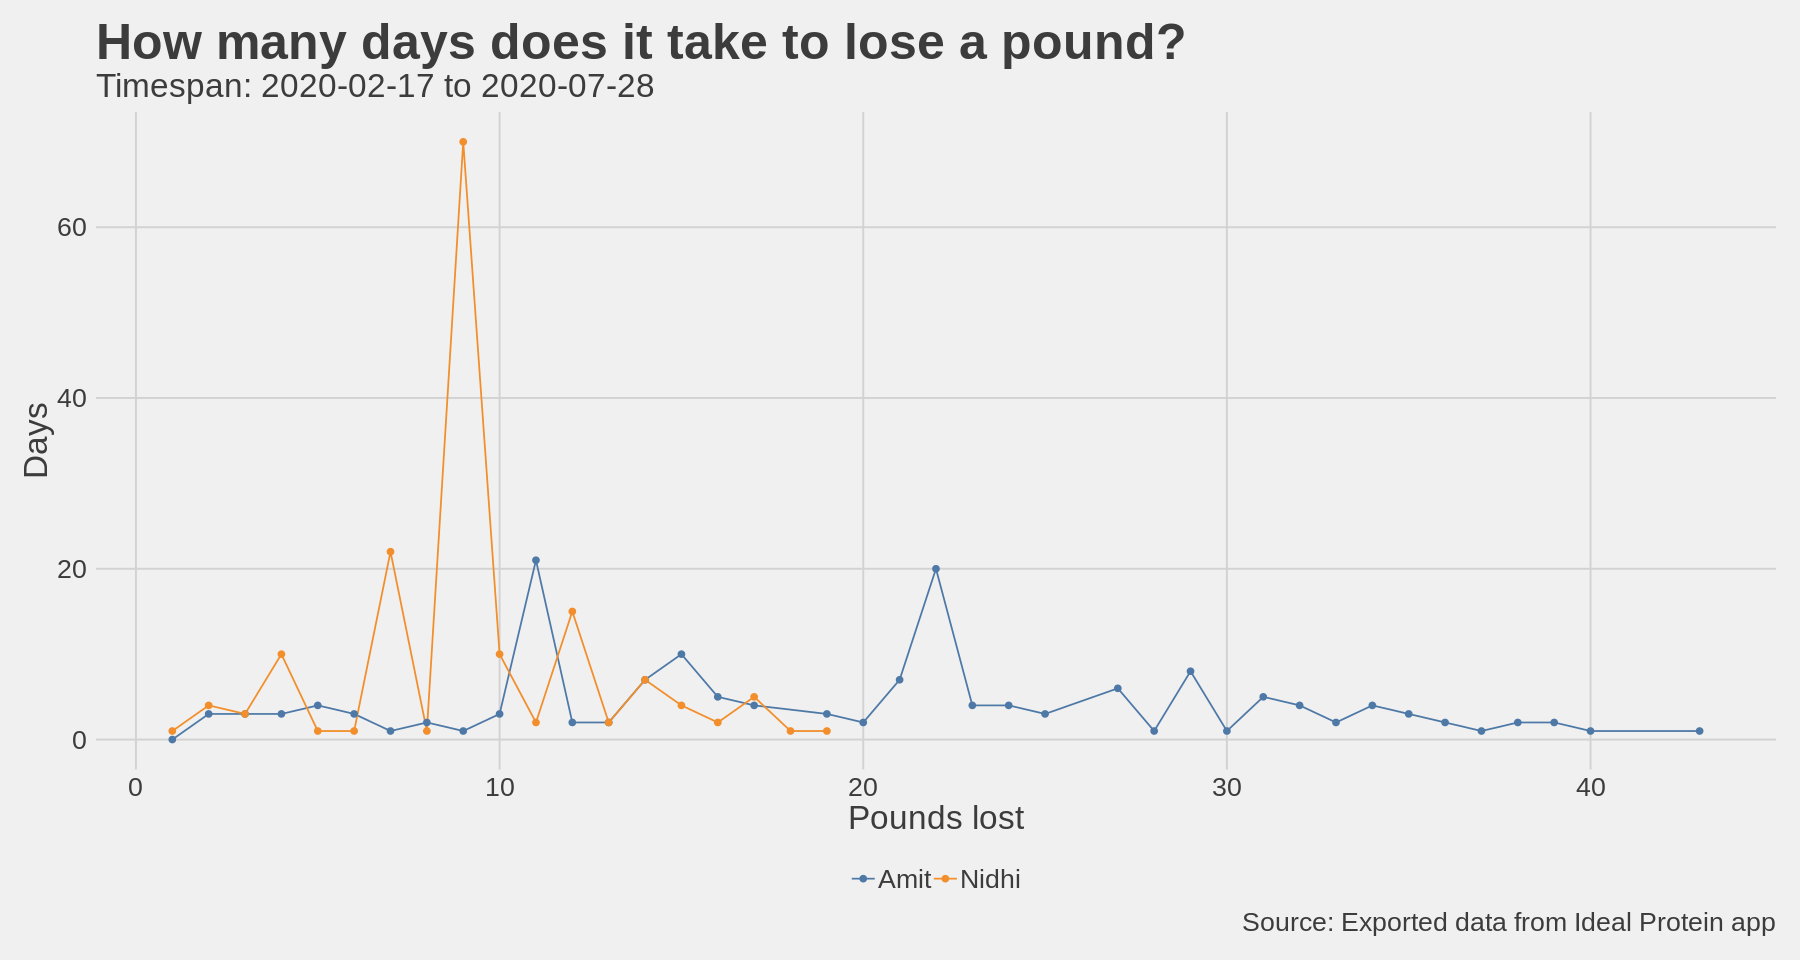

In [13]:
p <- df_days_to_next_drop %>%
  ggplot(aes(x=value, y=days, col=name)) +
  geom_line() +
  geom_point() +
  theme_fivethirtyeight() +
  labs(title=glue("How many days does it take to lose a pound?"),
  subtitle=glue("Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(axis.title = element_text()) + ylab('Days') + xlab("Pounds lost") +
  theme(text = element_text(size=20), legend.position="bottom", legend.title = element_blank()) + 
  scale_color_tableau()

p

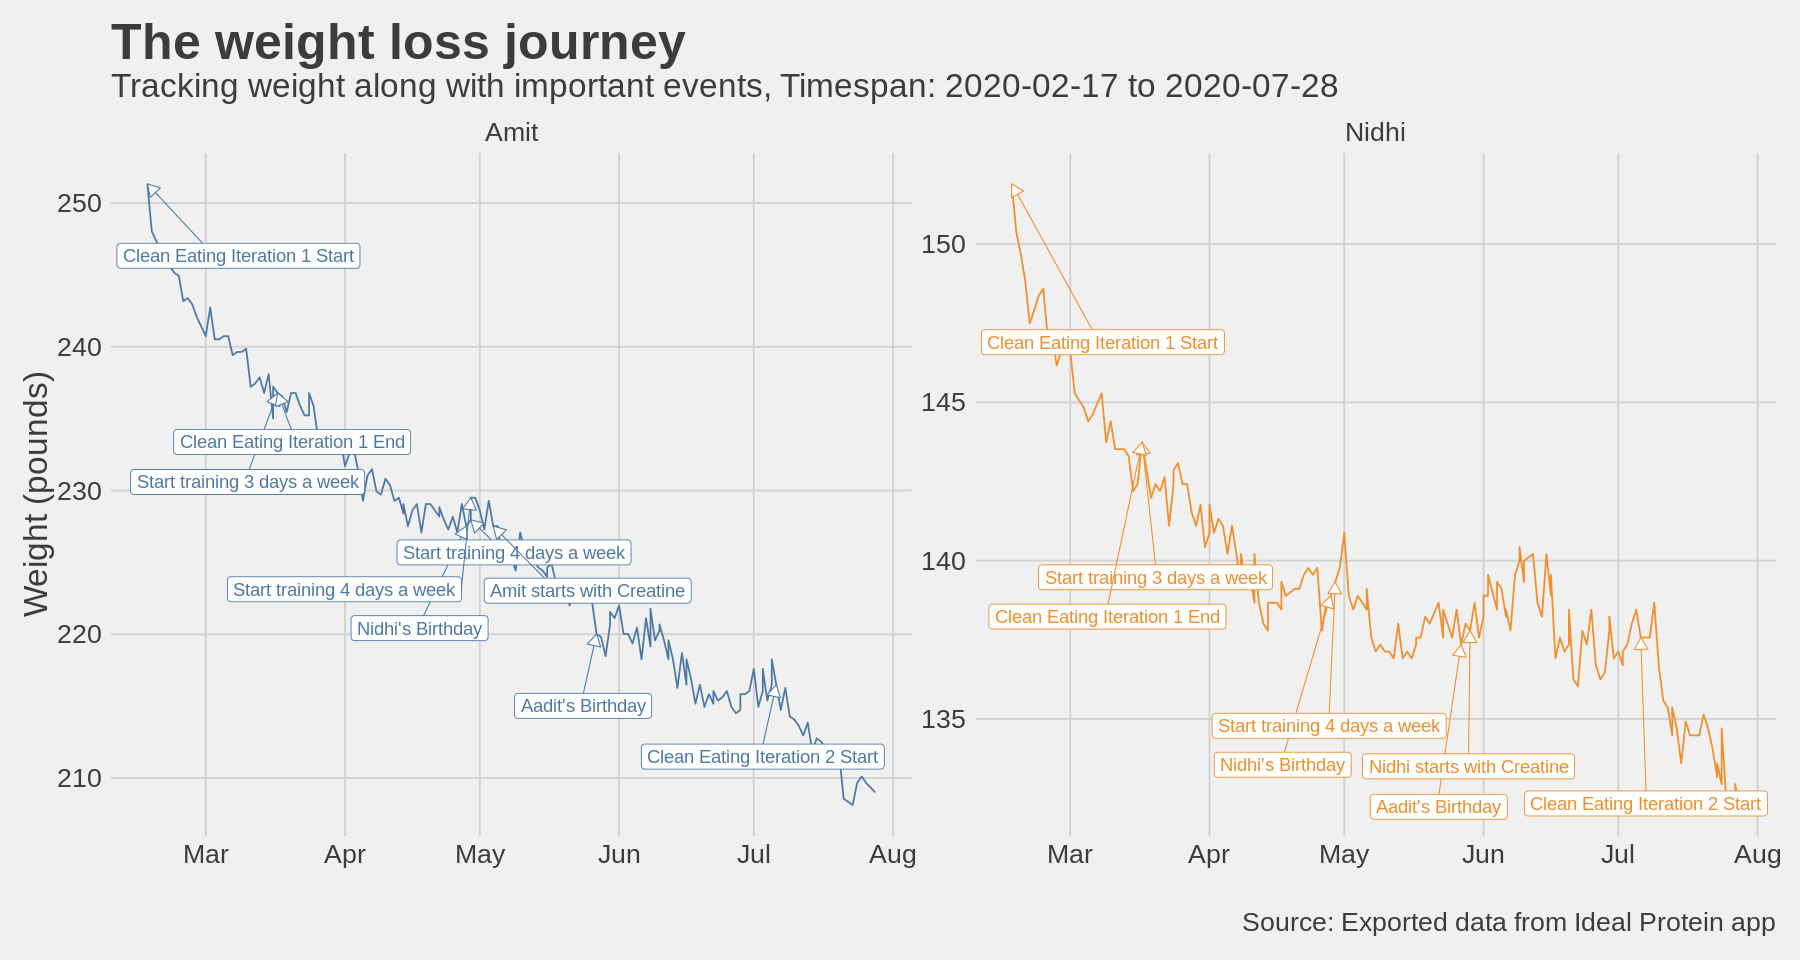

In [14]:
# plot some basic charts, since we have multiple metrics for each date
# so a faceted timeseries would be useful
options(repr.plot.width=15, repr.plot.height=8) 
df_tidy %>%
  filter(metric=="Weight") %>%
  left_join(important_dates ,
            by=c("name","Date")) %>%
  ggplot(aes(x=Date, y=value, col=name)) +
  geom_line() +
  facet_wrap(~name, scales = "free_y") + 
  theme_fivethirtyeight() +
  xlab("") +
  labs(title=glue("The weight loss journey"),
  subtitle=glue("Tracking weight along with important events, Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(text = element_text(size=20), legend.position="none") + 
  theme(axis.title = element_text()) + ylab('Weight (pounds)') +
  scale_color_tableau() + 
  geom_label_repel(aes(label = label),
                   nudge_y = -NUDGE_Y,
                   nudge_x=-3*NUDGE_X,
                   segment.size  = 0.3,
                   arrow = arrow(length = unit(0.02, "npc"), type = "closed", ends = "last"),
                   force = 10,
                   na.rm = TRUE)

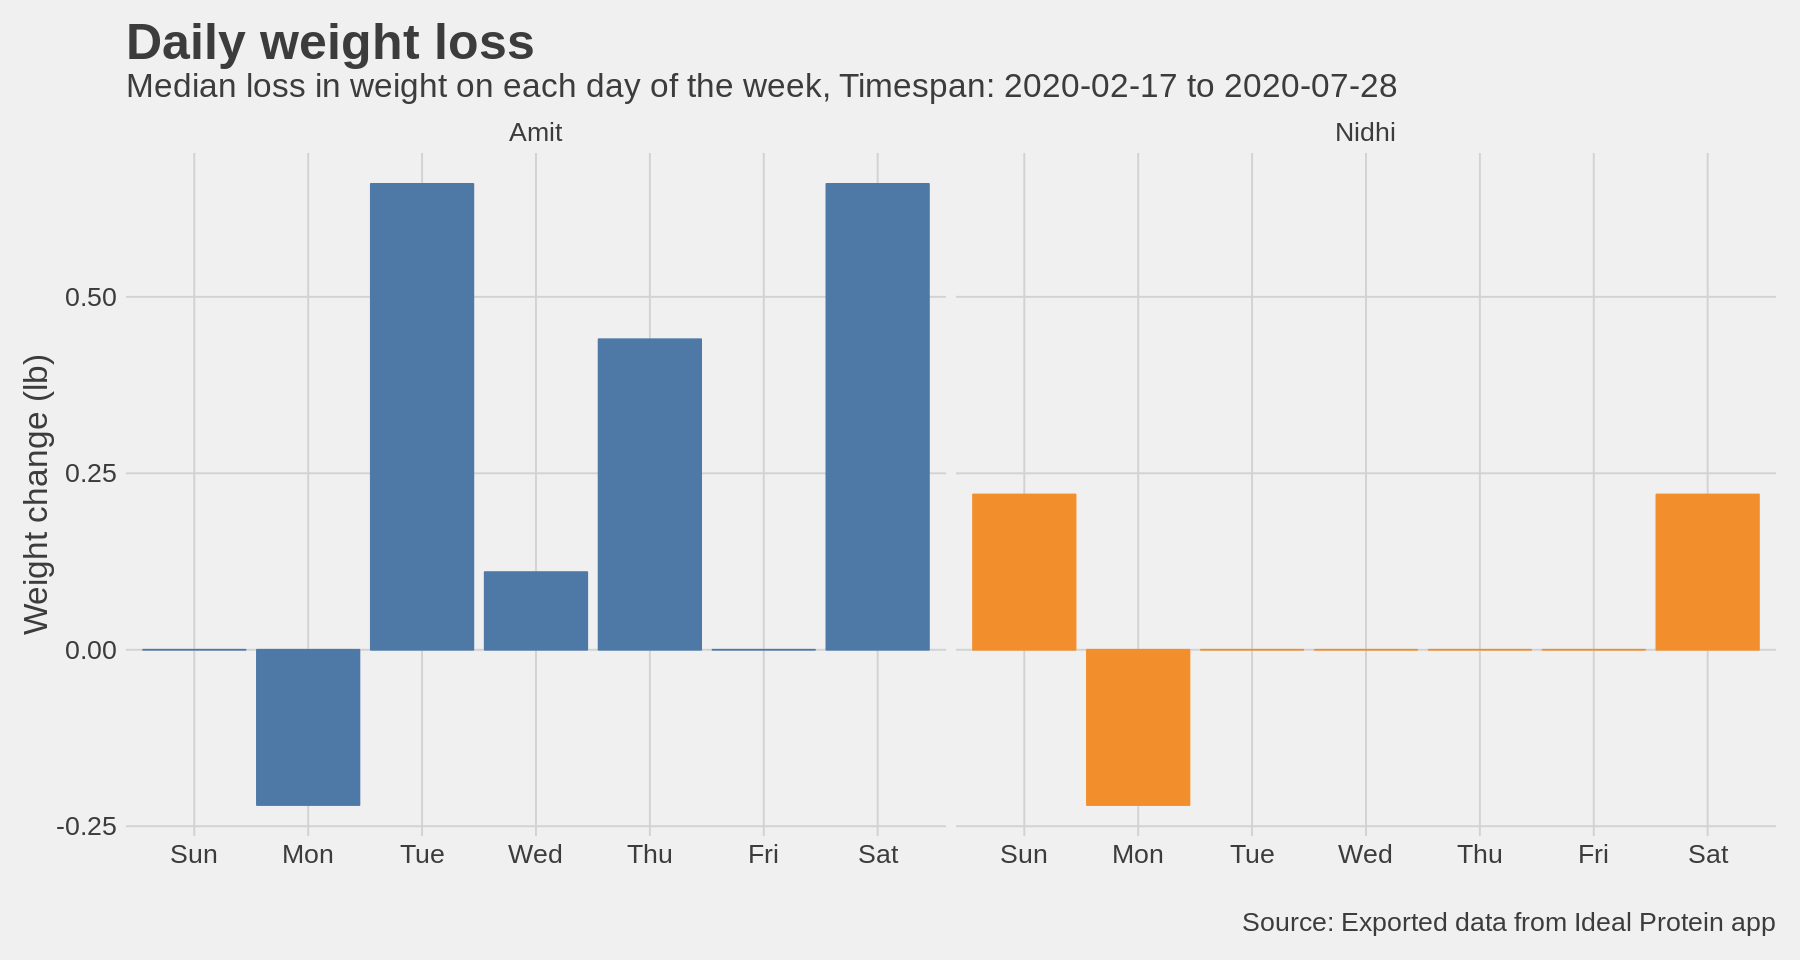

In [15]:
df_daily_wt_loss %>%
  mutate(weekday = wday(Date, label = TRUE)) %>%
  group_by(name, weekday) %>%
  summarize(wt_loss = median(daily_wt_loss, na.rm=TRUE)) %>%
  ggplot(aes(x=weekday, y=-1*wt_loss, fill=name, col=name)) +
  geom_bar(position="dodge", stat="identity") +
  facet_wrap(~name) + 
  theme_fivethirtyeight() +
  xlab("") + 
  labs(title=glue("Daily weight loss"),
  subtitle=glue("Median loss in weight on each day of the week, Timespan: {min(df_tidy$Date)} to {max(df_tidy$Date)}"),
  caption=CAPTION) + 
  theme(axis.title = element_text()) + ylab('Weight change (lb)') +
  theme(text = element_text(size=20), legend.position = "none") + 
  scale_fill_tableau() +
  scale_color_tableau()
  

  

In [16]:
library(prophet)

Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice


code for methods in class “Rcpp_model_prophet” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_model_prophet” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)



In [17]:
head(df_tidy)

Date,name,metric,value
<date>,<chr>,<chr>,<dbl>
2020-02-17,Nidhi,Weight,151.90
2020-02-18,Nidhi,Weight,150.36
2020-02-19,Nidhi,Weight,149.69
2020-02-20,Nidhi,Weight,148.81
2020-02-21,Nidhi,Weight,147.49
2020-02-23,Nidhi,Weight,148.37


In [ ]:
df_wt <- df_tidy %>%
  filter(metric=="Weight" & name=="Nidhi") %>%
  rename(ds=Date, y=value) %>%
  select(ds, y)
  

#m <- prophet(df_wt)
#df_wt

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [2]:
install.packages("forecast")

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(forecast)
# Automated forecasting using an exponential model
fit <- ets(myts)

# Automated forecasting using an ARIMA model
fit <- auto.arima(myts)

ERROR: Error: package or namespace load failed for ‘forecast’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/opt/miniconda3/envs/conda_env/lib/R/library/fracdiff/libs/fracdiff.so':
  libRblas.so: cannot open shared object file: No such file or directory
